In [2]:
import deepvision

config = {
    'batch_size': 16,
    'epochs': 5
}

d:\ml-learning\ml_env\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 126] The specified module could not be found
  warn(f"Failed to load image Python extension: {e}")


In [3]:
import torch

from torchvision import transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import pytorch_lightning as pl
from pytorch_lightning.callbacks import RichProgressBar
#%matplotlib notebook

device = 'cuda' if torch.cuda.is_available() else 'cpu'

transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Resize([224, 224])])

cifar_train = CIFAR10('cifar10', train=True, download=True, transform=transform)
cifar_test = CIFAR10('cifar10', train=False, download=True, transform=transform)

train_dataloader = DataLoader(cifar_train, batch_size=config['batch_size'], drop_last=True)
val_dataloader = DataLoader(cifar_test, batch_size=config['batch_size'], drop_last=True)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
pt_model = deepvision.models.ResNet18V2(include_top=True,
                                       classes=10,
                                       input_shape=(3, 224, 224),
                                       backend='pytorch')

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(pt_model.parameters(), 1e-5)

pt_model.compile(loss=loss, optimizer=optimizer)
trainer = pl.Trainer(accelerator=device, max_epochs=config['epochs'], callbacks=[RichProgressBar(leave=True)])
trainer.fit(pt_model, train_dataloader, val_dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name      ┃ Type               ┃ Params ┃
┡━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ acc       │ MulticlassAccuracy │      0 │
│ 1 │ conv1     │ Conv2d             │  9.5 K │
│ 2 │ maxpool1  │ MaxPool2d          │      0 │
│ 3 │ stacks    │ ModuleList         │ 11.2 M │
│ 4 │ batchnorm │ BatchNorm2d        │  1.0 K │
│ 5 │ pool      │ AvgPool2d          │      0 │
│ 6 │ top_dense │ Linear             │  5.1 K │
│ 7 │ loss      │ CrossEntropyLoss   │      0 │
└───┴───────────┴────────────────────┴────────┘

Trainable params: 11.2 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 11.2 M                                                                                               
Total estimated model params size (MB): 44

Output()

d:\ml-learning\ml_env\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:229: 
PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. 
Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) 
in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,

d:\ml-learning\ml_env\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:229: 
PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. 
Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) 
in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,

Output()

Output()

Output()

Output()

`Trainer.fit` stopped: `max_epochs=5` reached.


In [5]:
classnames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

feature_analysis = deepvision.evaluation.FeatureAnalyzer(pt_model, 
                                                         train_dataloader,
                                                         limit_batches=500,
                                                         classnames=classnames,
                                                         backend='pytorch')

In [6]:
feature_analysis.extract_features()

Processing batch 500/3125
Processing finished. Extracting features and classes...
Features extracted. You can now visualize them or perform analysis without re-running the extraction.


Principal component analysis...
[t-SNE] Computing 226 nearest neighbors...
[t-SNE] Indexed 8016 samples in 0.004s...


d:\ml-learning\ml_env\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\ml-learning\ml_env\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 8016 samples in 0.243s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8016
[t-SNE] Computed conditional probabilities for sample 2000 / 8016
[t-SNE] Computed conditional probabilities for sample 3000 / 8016
[t-SNE] Computed conditional probabilities for sample 4000 / 8016
[t-SNE] Computed conditional probabilities for sample 5000 / 8016
[t-SNE] Computed conditional probabilities for sample 6000 / 8016
[t-SNE] Computed conditional probabilities for sample 7000 / 8016
[t-SNE] Computed conditional probabilities for sample 8000 / 8016
[t-SNE] Computed conditional probabilities for sample 8016 / 8016
[t-SNE] Mean sigma: 0.000264
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.953869
[t-SNE] KL divergence after 1000 iterations: 0.405888


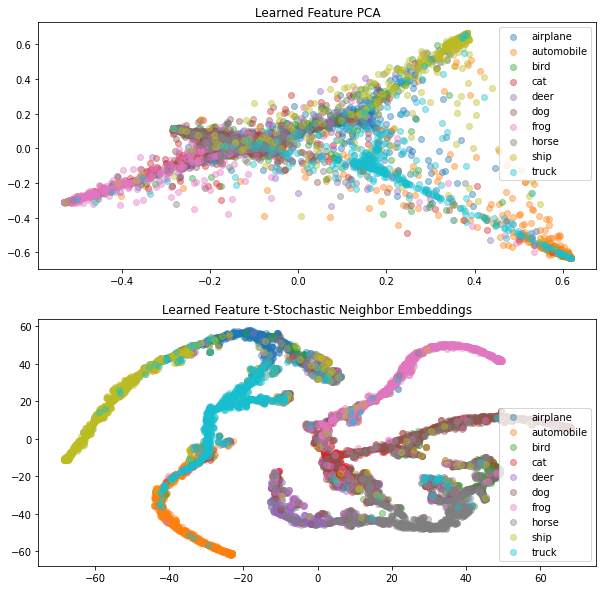

In [7]:
feature_analysis.feature_analysis(components=2)

Principal component analysis...
[t-SNE] Computing 226 nearest neighbors...
[t-SNE] Indexed 8016 samples in 0.005s...


d:\ml-learning\ml_env\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\ml-learning\ml_env\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 8016 samples in 0.260s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8016
[t-SNE] Computed conditional probabilities for sample 2000 / 8016
[t-SNE] Computed conditional probabilities for sample 3000 / 8016
[t-SNE] Computed conditional probabilities for sample 4000 / 8016
[t-SNE] Computed conditional probabilities for sample 5000 / 8016
[t-SNE] Computed conditional probabilities for sample 6000 / 8016
[t-SNE] Computed conditional probabilities for sample 7000 / 8016
[t-SNE] Computed conditional probabilities for sample 8000 / 8016
[t-SNE] Computed conditional probabilities for sample 8016 / 8016
[t-SNE] Mean sigma: 0.000346
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.339676
[t-SNE] KL divergence after 1000 iterations: 0.325749


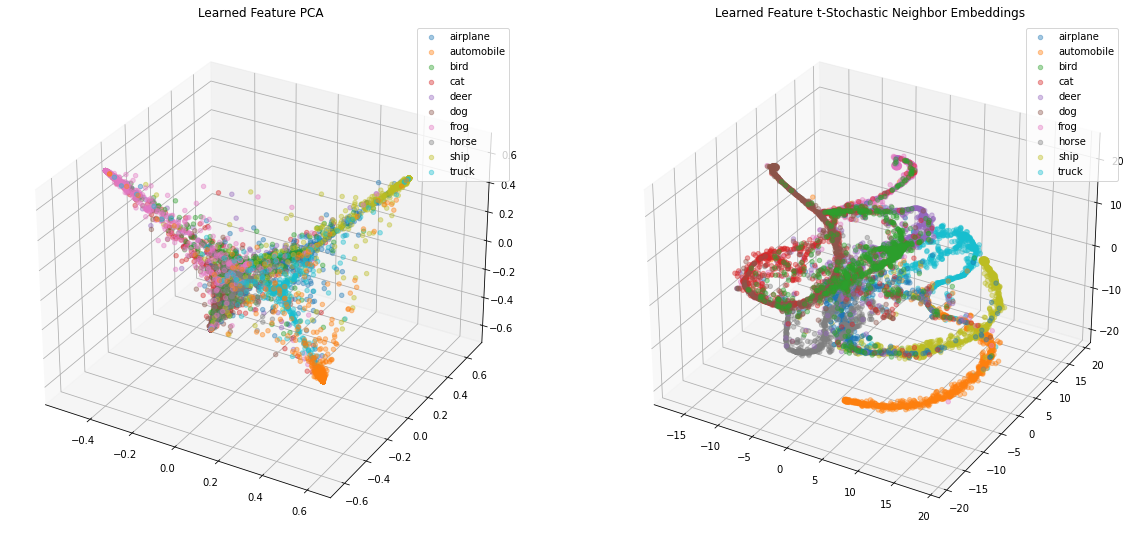

In [8]:
feature_analysis.feature_analysis(components=3, figsize=(20, 20))

In [9]:
import tensorflow_datasets as tfds
import tensorflow as tf

(train_set, test_set), info = tfds.load("cifar10", 
                                           split=["train", "test"],
                                           as_supervised=True, with_info=True)

class_names = info.features["label"].names
n_classes = info.features["label"].num_classes

def preprocess_img(img, label):
    img = tf.image.resize(img, (224, 224))
    return img, label

train_set = train_set.map(preprocess_img).batch(config['batch_size']).prefetch(tf.data.AUTOTUNE)
test_set = test_set.map(preprocess_img).batch(config['batch_size']).prefetch(tf.data.AUTOTUNE)

In [10]:
tf_model = deepvision.models.ViTTiny16(include_top=True,
                                       classes=10,
                                       input_shape=(224, 224, 3),
                                       backend='tensorflow')

tf_model.compile(
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
  metrics=['accuracy']
)

Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [11]:
history = tf_model.fit(train_set, epochs=config['epochs'], validation_data=test_set)

Epoch 1/5
3125/3125 [==============================] - 502s 158ms/step - loss: 2.1144 - accuracy: 0.2075 - val_loss: 2.0357 - val_accuracy: 0.2371
Epoch 2/5
3125/3125 [==============================] - 490s 157ms/step - loss: 1.9508 - accuracy: 0.2675 - val_loss: 1.8688 - val_accuracy: 0.2961
Epoch 3/5
3125/3125 [==============================] - 492s 157ms/step - loss: 1.7965 - accuracy: 0.3279 - val_loss: 1.7108 - val_accuracy: 0.3576
Epoch 4/5
3125/3125 [==============================] - 484s 155ms/step - loss: 1.6915 - accuracy: 0.3674 - val_loss: 1.6847 - val_accuracy: 0.3730
Epoch 5/5
3125/3125 [==============================] - 482s 154ms/step - loss: 1.6124 - accuracy: 0.4016 - val_loss: 1.6507 - val_accuracy: 0.3922


In [12]:
feature_analysis = deepvision.evaluation.FeatureAnalyzer(tf_model, 
                                                         train_set,
                                                         limit_batches=500,
                                                         classnames=class_names,
                                                         backend='tensorflow')

In [13]:
feature_analysis.extract_features()

Processing batch 499/3125
Processing finished. Extracting features and classes...
Features extracted. You can now visualize them or perform analysis without re-running the extraction.


Principal component analysis...
[t-SNE] Computing 226 nearest neighbors...
[t-SNE] Indexed 8000 samples in 0.004s...


d:\ml-learning\ml_env\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\ml-learning\ml_env\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 8000 samples in 0.234s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8000
[t-SNE] Computed conditional probabilities for sample 2000 / 8000
[t-SNE] Computed conditional probabilities for sample 3000 / 8000
[t-SNE] Computed conditional probabilities for sample 4000 / 8000
[t-SNE] Computed conditional probabilities for sample 5000 / 8000
[t-SNE] Computed conditional probabilities for sample 6000 / 8000
[t-SNE] Computed conditional probabilities for sample 7000 / 8000
[t-SNE] Computed conditional probabilities for sample 8000 / 8000
[t-SNE] Mean sigma: 0.012786
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.182747
[t-SNE] KL divergence after 1000 iterations: 0.576627


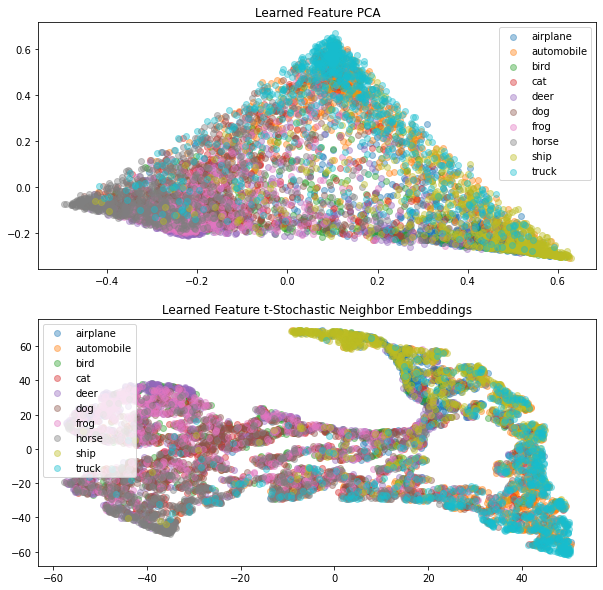

In [14]:
feature_analysis.feature_analysis(components=2)

Principal component analysis...
[t-SNE] Computing 226 nearest neighbors...
[t-SNE] Indexed 8000 samples in 0.005s...


d:\ml-learning\ml_env\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\ml-learning\ml_env\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 8000 samples in 0.273s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8000
[t-SNE] Computed conditional probabilities for sample 2000 / 8000
[t-SNE] Computed conditional probabilities for sample 3000 / 8000
[t-SNE] Computed conditional probabilities for sample 4000 / 8000
[t-SNE] Computed conditional probabilities for sample 5000 / 8000
[t-SNE] Computed conditional probabilities for sample 6000 / 8000
[t-SNE] Computed conditional probabilities for sample 7000 / 8000
[t-SNE] Computed conditional probabilities for sample 8000 / 8000
[t-SNE] Mean sigma: 0.022949
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.397945
[t-SNE] KL divergence after 1000 iterations: 0.572724


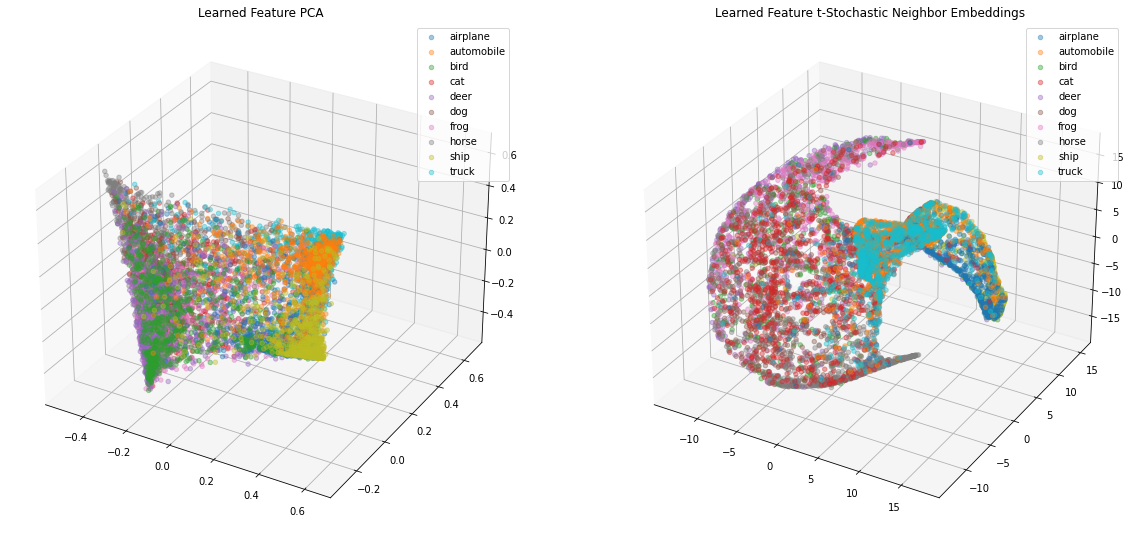

In [15]:
feature_analysis.feature_analysis(components=3, figsize=(20, 20))